<a href="https://colab.research.google.com/github/roshanappa/Exploraratory-Data-Analysis/blob/master/Bank_Campaign_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Data.

In [0]:
data = pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [0]:
pd.pandas.set_option('display.max_columns',None)

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
len(data.columns)

21

In [0]:
data.rename(columns={'emp.var.rate':'EVR','cons.price.idx':'CPI','cons.conf.idx':'CCI','euribor3m':'euribor','nr.employed':'no_emp'},inplace=True)

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'EVR', 'CPI', 'CCI', 'euribor', 'no_emp', 'y'],
      dtype='object')

In [15]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
EVR            0
CPI            0
CCI            0
euribor        0
no_emp         0
y              0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     41188 non-null  int64  
 11  campaign     41188 non-null  int64  
 12  pdays        41188 non-null  int64  
 13  previous     41188 non-null  int64  
 14  poutcome     41188 non-null  object 
 15  EVR          41188 non-null  float64
 16  CPI          41188 non-null  float64
 17  CCI          41188 non-null  float64
 18  euribor      41188 non-null  float64
 19  no_e

In [17]:
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
EVR            float64
CPI            float64
CCI            float64
euribor        float64
no_emp         float64
y               object
dtype: object

In [19]:
round(data.describe(),1)

,age,duration,campaign,pdays,previous,EVR,CPI,CCI,euribor,no_emp
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0
std,10.4,259.3,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1


In [20]:
data.duplicated().sum()

12

In [0]:
data.drop_duplicates(inplace=True)

That's how i had removed the duplicated or we can same record that we  recoreded.

In [22]:
data.shape

(41176, 21)

In [29]:
data1 = data.copy()   #To remove the unkown values.
for col in data.columns:
  data1 = data1.loc[~(data[col]=='unkown')]
data1.shape

(41176, 21)

## Univariate Exploration.

In [32]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,EVR,CPI,CCI,euribor,no_emp,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


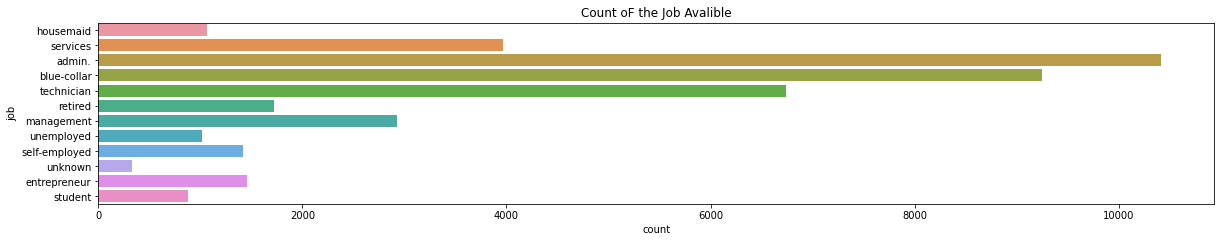

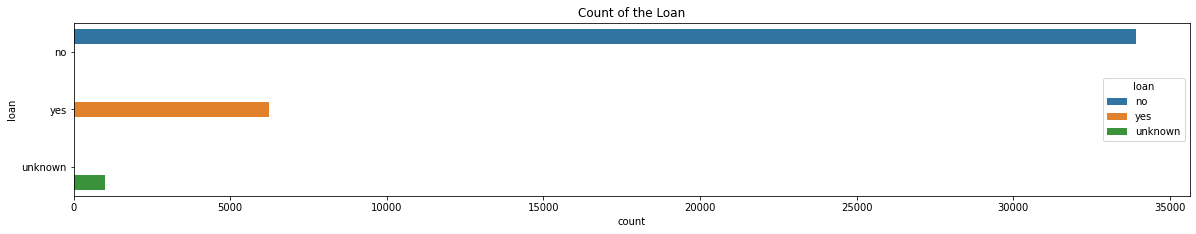

In [46]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1)
plt.subplot(211)
sns.countplot(y =data['job'])
plt.title('Count oF the Job Avalible')
plt.show()
plt.figure(figsize=(20,7))
plt.subplot(212)
sns.countplot(y =data['loan'],hue=data['loan'])
plt.title('Count of the Loan')
plt.show()

- From above we can say that the Job and personal Loan counts avaliable.
- Since from the above we can say,HERE the people with no Personal loan are very less comparatively the people who having the loan.
-People with job Service,Admin,Blue Collar and Technician are high in the counts than the others.

In [47]:
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [50]:
data1['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

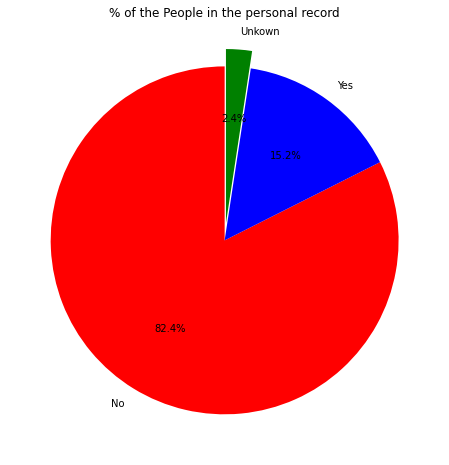

In [51]:
plt.figure(figsize=(10,8))
plt.pie(data1['loan'].value_counts(),explode=[0,0,0.1],colors=['red','blue','green'],autopct='%1.1f%%',startangle=90,labels=['No','Yes','Unkown'])
plt.title('% of the People in the personal record')
plt.show()

In [53]:
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [0]:
labels=['admin.','blue-collar','technician','services','management','retired','entrepreneur','self-employed','housemaid','unemployed','student','unknown']
explode = [0.1,0.1,0.1,0,0,0,0,0,0,0,0.1,0.4]

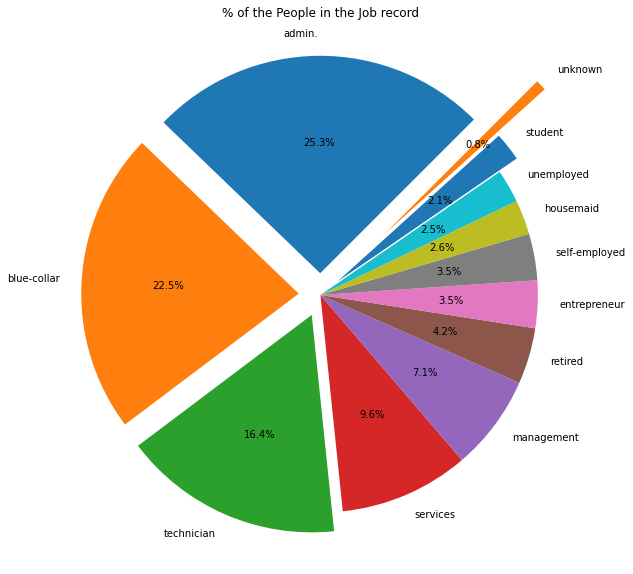

In [80]:
plt.figure(figsize=(20,10))
plt.pie(data1['job'].value_counts(),explode=explode,autopct='%1.1f%%',startangle=45,labels=labels,rotatelabels=0)
plt.title('% of the People in the Job record')
plt.show()

In [81]:
data['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

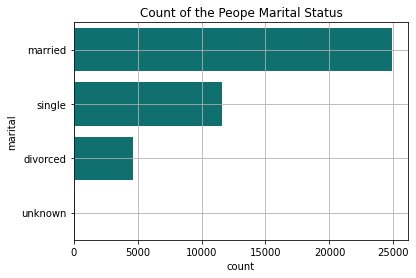

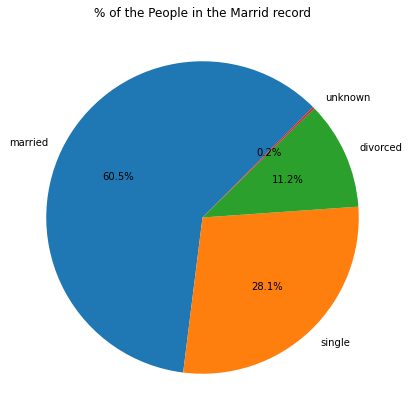

In [95]:
order = ['married','single','divorced','unknown']
sns.countplot(y = data['marital'],order=order,color='teal')
plt.title('Count of the Peope Marital Status')
plt.grid()
plt.show()
explode=[0,0,0,0]
plt.figure(figsize=(7,10))
plt.pie(data1['marital'].value_counts(),explode=explode,autopct='%1.1f%%',startangle=45,labels=order,rotatelabels=0)
plt.title('% of the People in the Marrid record')
plt.show()

In [87]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

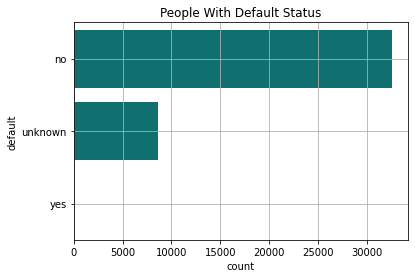

In [90]:
order = ['no','unknown','yes']
sns.countplot(y = data['default'],order=order,color='teal')
plt.title('People With Default Status')
plt.grid()
plt.show()

In [101]:
data1['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

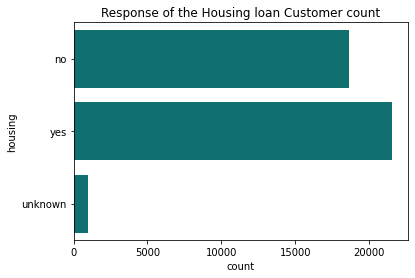

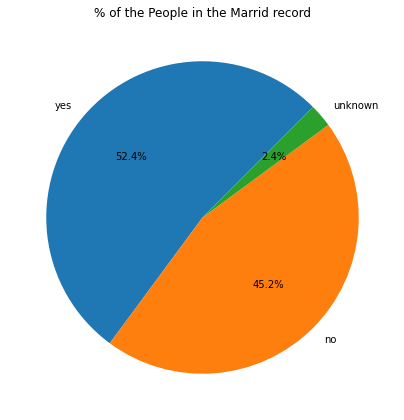

In [102]:
sns.countplot(y=data['housing'],color='teal')
plt.title('Response of the Housing loan Customer count')
plt.show()

explode=[0,0,0]
label = ['yes','no','unknown']
plt.figure(figsize=(7,10))
plt.pie(data1['housing'].value_counts(),explode=explode,autopct='%1.1f%%',startangle=45,labels=label,rotatelabels=0)
plt.title('% of the People in the Marrid record')
plt.show()

In [103]:
data['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

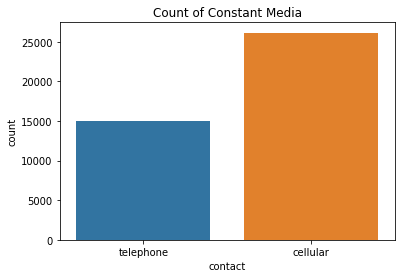

In [104]:
sns.countplot(data['contact']).set_title('Count of Constant Media')
plt.show()

In [105]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

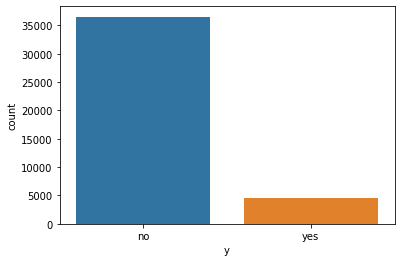

In [106]:
sns.countplot(data['y'])
plt.show()

In [0]:
df_median_age= data.loc[data['age']>data['age'].median()]
df_mean_age= data.loc[data['age']>data['age'].mean()]

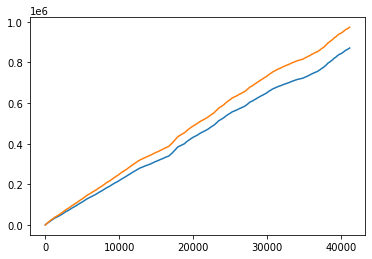

In [116]:
df_mean_age['age'].cumsum().plot()
df_median_age['age'].cumsum().plot()
plt.show()

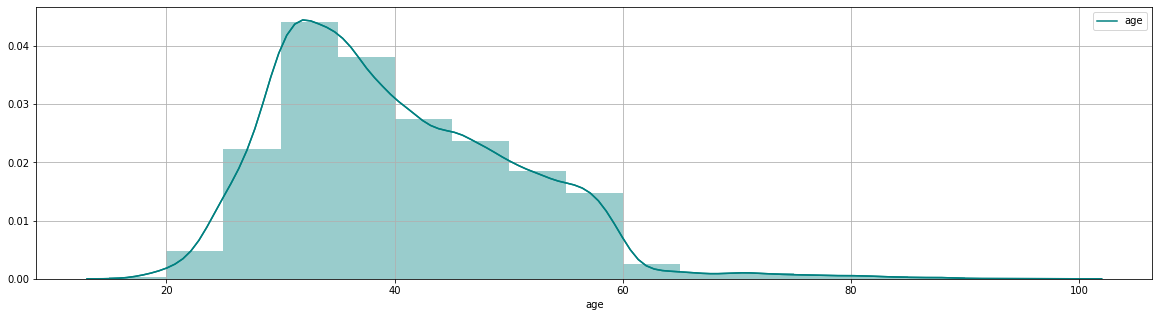

In [125]:
plt.figure(figsize=(20,5))
ax = sns.kdeplot(data['age'],color='teal')
sns.distplot(data['age'],ax=ax,color='teal',bins=range(15,100,5))
plt.grid()
plt.show()

Here we can say the people with Age from 30 to 40 years are highly avaliable.

In [129]:
len(data.query('20 < age <= 60').index)/len(data.index)

0.9745239945599379

97% of people are avallible in the 20 to 60 years old.

In [130]:
len(data.query('30 < age >=40').index)/len(data.index)

0.4511365844181076

Whereas the people which are avalible in the 30 and 40 are 45% and remaning avalible in the other age criteria.

In [133]:
data.describe()['duration']

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

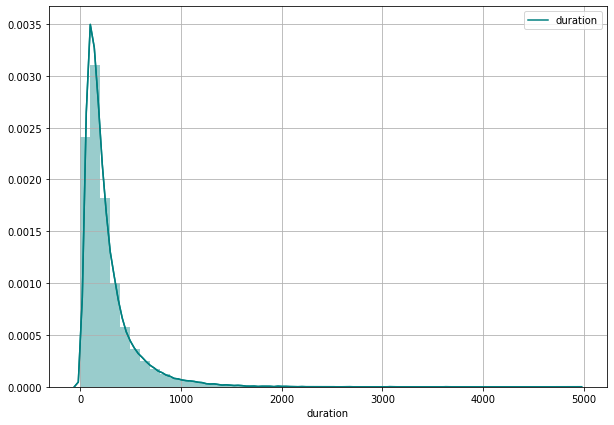

In [144]:
plt.figure(figsize=(10,7))
ax = sns.kdeplot(data['duration'],color='teal')
sns.distplot(data['duration'],ax=ax,color='teal')
plt.grid()
plt.show()

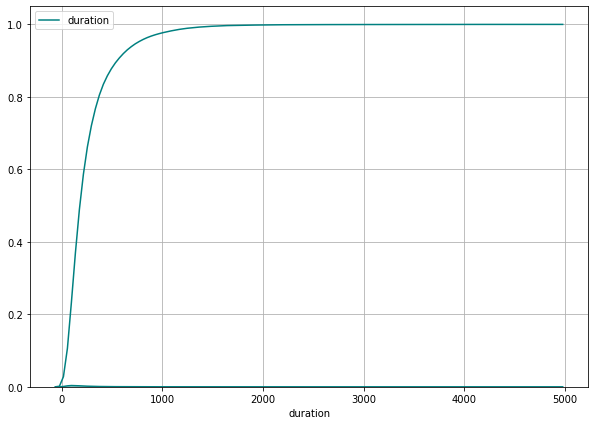

In [145]:
plt.figure(figsize=(10,7))
ax = sns.kdeplot(data['duration'],color='teal',cumulative=True)
sns.distplot(data['duration'],ax=ax,color='teal')
plt.grid()
plt.show()

- From the above the Graph showing the duration is much skewed..

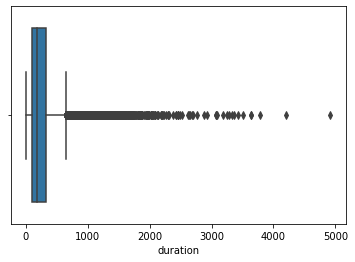

kurtosis of the duration :- 20.24377093511248
skewness of the duration :- 3.2628075094947224


In [148]:
sns.boxplot(data['duration'])
plt.show()

print('kurtosis of the duration :-',data['duration'].kurtosis())
print('skewness of the duration :-',data['duration'].skew())

In [150]:
if data['duration'].mean() > data['duration'].median():
  print('Right Skewed data') 
else:
  print('Left Skewed Data')

Right Skewed data


The duration feature right skewed from the above the statement.

In [153]:
data['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

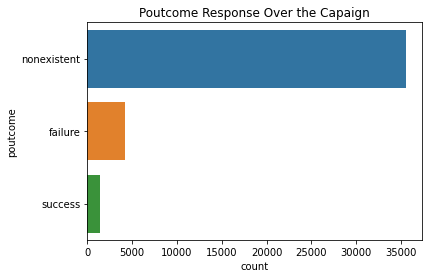

In [156]:
sns.countplot(data=data,y=data['poutcome']).set_title('Poutcome Response Over the Capaign')
plt.show()

In [158]:
data['EVR'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: EVR, dtype: int64

In [0]:
list_unique = [data['EVR'].value_counts()]

In [163]:
list_unique

[ 1.4    16228
 -1.8     9182
  1.1     7762
 -0.1     3682
 -2.9     1662
 -3.4     1070
 -1.7      773
 -1.1      635
 -3.0      172
 -0.2       10
 Name: EVR, dtype: int64]

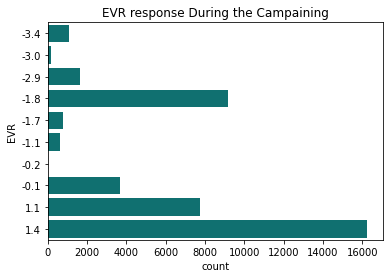

In [169]:
sns.countplot(y = data['EVR'],order=list_unique.sort(),color='teal').set_title('EVR response During the Campaining')
plt.show()

The distribution for EVR seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the EVR was more than -0.2.

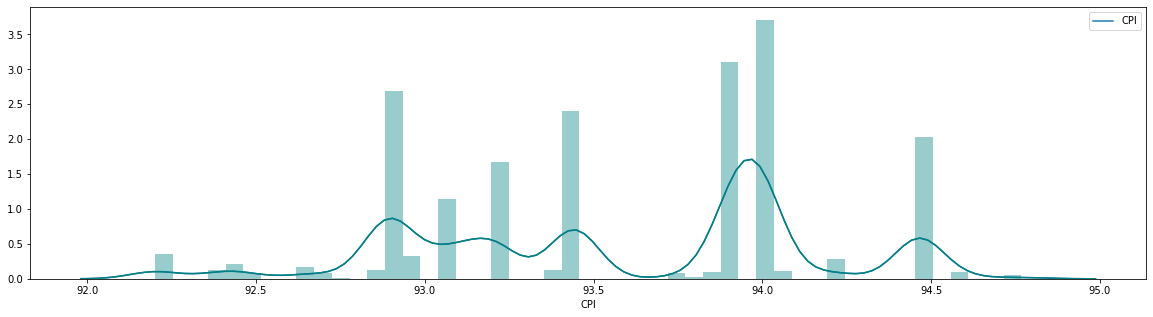

In [176]:
plt.figure(figsize=(20,5))
ax = sns.kdeplot(data['CPI'])
sns.distplot(data['CPI'], color = 'teal',ax=ax)
plt.show()

This data is looking like Multimodel type of thing.It is distributed with largely ups and downs avalible in this data.

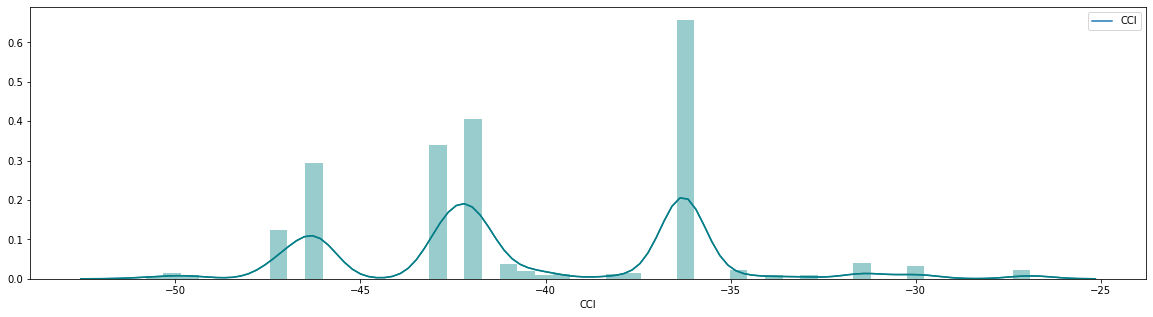

In [178]:
plt.figure(figsize=(20,5))
ax = sns.kdeplot(data['CCI'])
sns.distplot(data['CCI'], color = 'teal',ax=ax)
plt.show()

This data is looking like Multimodel type of thing.It is distributed with largely ups and downs avalible in this data.

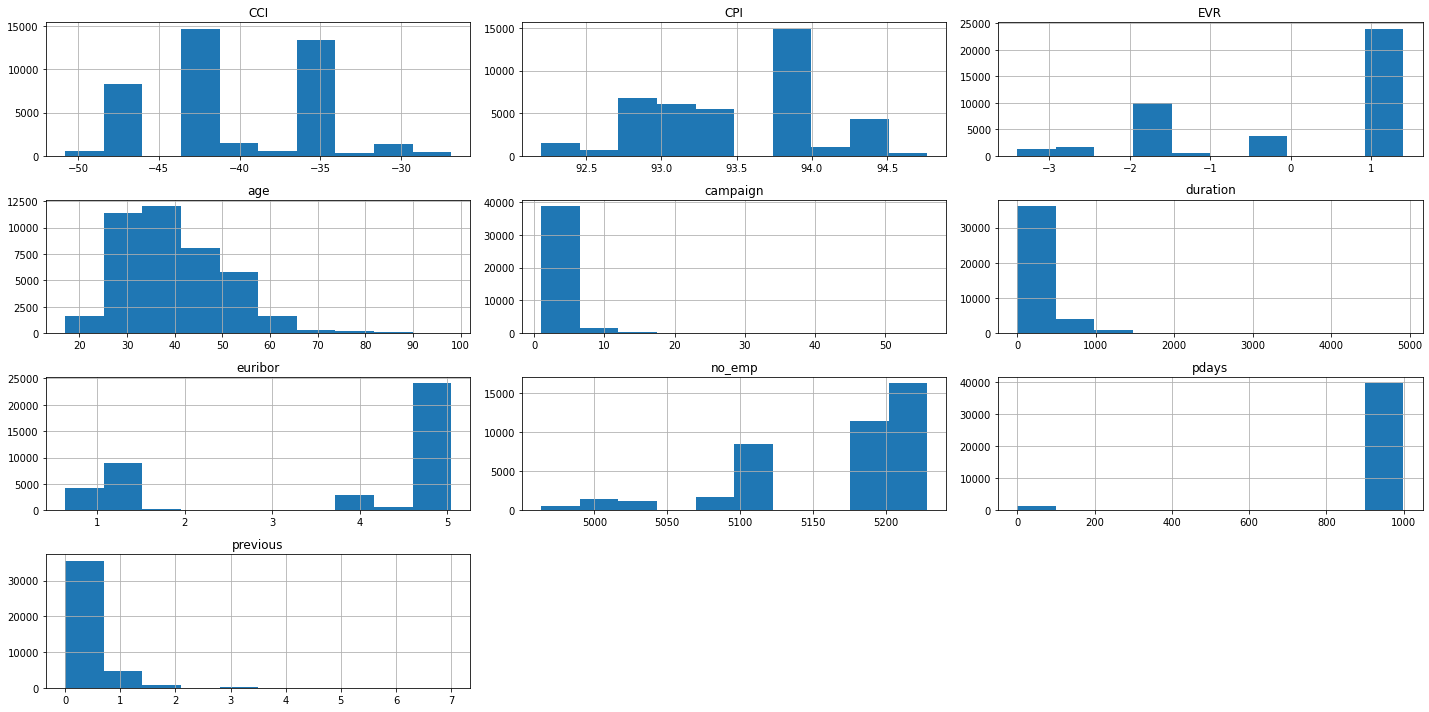

In [181]:
fig,ax = plt.subplots(figsize=(20,10)) 
data.hist(ax=ax)
plt.tight_layout()
plt.show()

In [182]:
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
EVR            float64
CPI            float64
CCI            float64
euribor        float64
no_emp         float64
y               object
dtype: object

In [0]:
dff = data[['age','duration','campaign','pdays','previous','EVR','CPI','CCI','euribor','no_emp']]

In [184]:
dff.corr()

,age,duration,campaign,pdays,previous,EVR,CPI,CCI,euribor,no_emp
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
EVR,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
CPI,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
CCI,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
no_emp,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


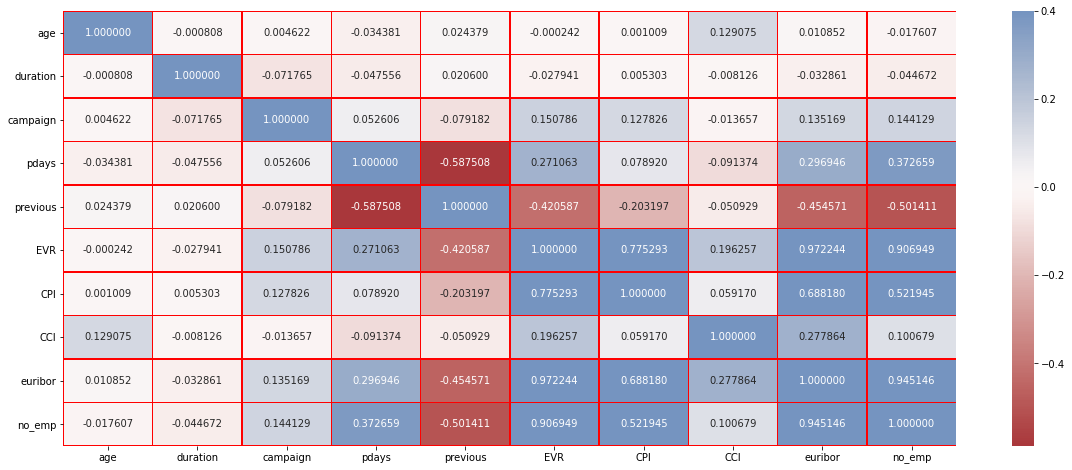

In [186]:
plt.figure(figsize=(20,8))
sns.heatmap(dff.corr(),annot=True,cmap='vlag_r',fmt='f',center=0,linecolor='red',linewidths=0.4,vmax=0.4)
plt.show()

Here,we can see the pdays is highly correlated with privious and previous is is highly correlated with euribor and no_emp and euibor is highly correlated with CPI and EVR.

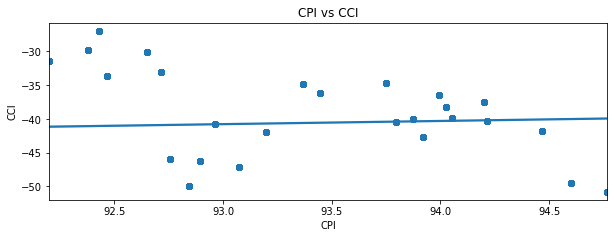

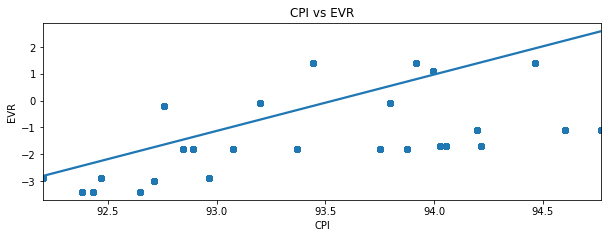

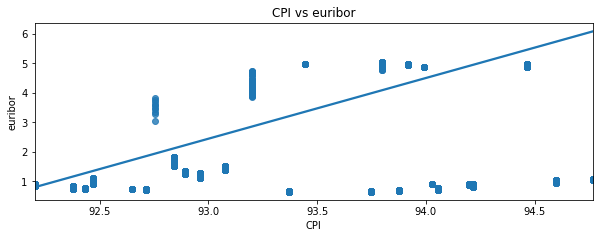

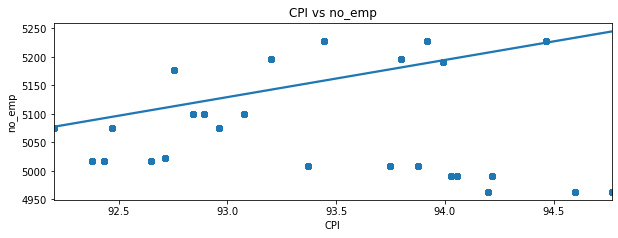

In [202]:
plt.figure(figsize=(10,15))
plt.subplot(411)
sns.regplot(data['CPI'],data['CCI']).set_title('CPI vs CCI')
plt.show()

plt.figure(figsize=(10,15))
plt.subplot(412)
sns.regplot(data['CPI'],data['EVR']).set_title('CPI vs EVR')
plt.show()

plt.figure(figsize=(10,15))
plt.subplot(413)
sns.regplot(data['CPI'],data['euribor']).set_title('CPI vs euribor')
plt.show()

plt.figure(figsize=(10,15))
plt.subplot(414)
sns.regplot(data['CPI'],data['no_emp']).set_title('CPI vs no_emp')
plt.show()

From the above we can see the CPI and CCI there is no relationship but if you see the relationship inbetween the CPI and no_emp and CPI and euribor is pretty much proportional to each other.But there is high hetrosidasticity.

In [206]:
data.groupby(data['job']).size()

job
admin.           10419
blue-collar       9253
entrepreneur      1456
housemaid         1060
management        2924
retired           1718
self-employed     1421
services          3967
student            875
technician        6739
unemployed        1014
unknown            330
dtype: int64

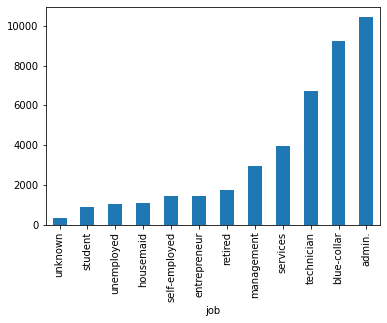

In [213]:
data.groupby(data['job']).size().sort_values(ascending=True).plot(kind='bar')
plt.show()

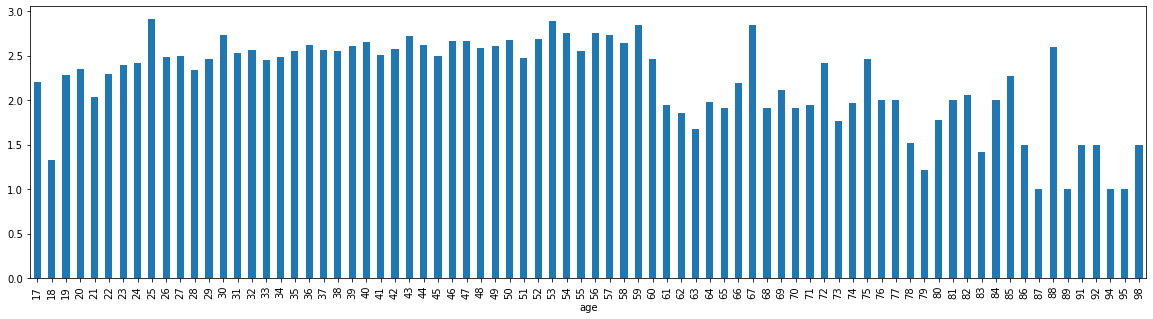

In [231]:
plt.figure(figsize=(20,5))
dataframe =data.groupby('age').mean()
dataframe['campaign'].plot(kind='bar')
plt.show()

In [0]:
d= {'no':0,'yes':1}
data['y']=data['y'].map(d)

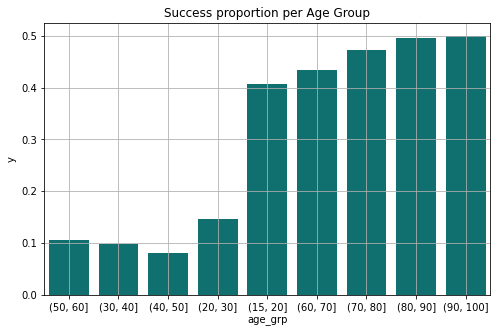

In [246]:
# Let's create age bins

age_bins = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

data['age_grp'] = pd.cut(data['age'], bins = age_bins)
data['age_grp'] = data['age_grp'].astype('str')
plt.figure(figsize = (8,5))
sns.barplot(data = data, x = 'age_grp', y = 'y', ci = None, color = 'teal');
plt.title('Success proportion per Age Group')
plt.grid()

This is an interesting trend. Although 97.5% of clients fall in age range of 20-60, they are the ones who are least likely to open the account. Success rate for the calls is more for clients upto 20 and above 60 years of age.

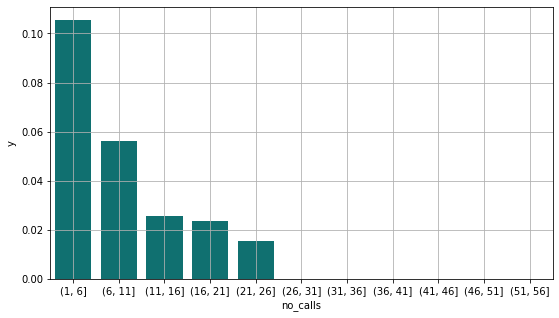

In [249]:
# Let's create campaign bins

campaign_bins = [i for i in range(1, 57, 5)]

data['no_calls'] = pd.cut(data['campaign'], bins = campaign_bins)
plt.figure(figsize = (9,5))
sns.barplot(data = data, x = 'no_calls', y = 'y', color = 'teal', ci = None);
plt.grid()

The probability of customer opening the account reduces far greatly as the number of calls increase. Infact, probability is almost zero after 26 calls. Probability after 11 calls is less than 3%.


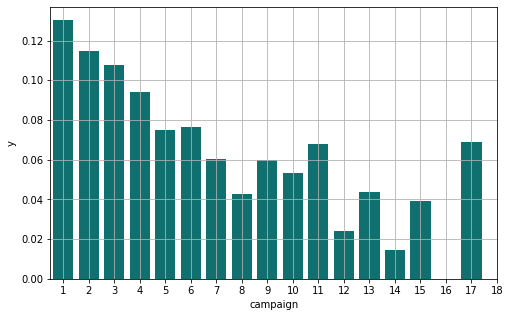

In [252]:
plt.figure(figsize = (8,5))
sns.barplot(data = data, x = 'campaign', y = 'y', color = 'teal', ci = None);
plt.xlim(-0.5, 17)
plt.grid()

Most number of customers say yes to opening the account in very first call. As the number of calls increase, the probability decreases for the customer agreeing to opening the account.

In [253]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,EVR,CPI,CCI,euribor,no_emp,y,age_grp,no_calls
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]",NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]",NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30, 40]",NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30, 40]",NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50, 60]",NaN


In [303]:
dataframe1 = data.groupby(['job','y']).size()
dataframe1

job            y
admin.         0    9068
               1    1351
blue-collar    0    8615
               1     638
entrepreneur   0    1332
               1     124
housemaid      0     954
               1     106
management     0    2596
               1     328
retired        0    1284
               1     434
self-employed  0    1272
               1     149
services       0    3644
               1     323
student        0     600
               1     275
technician     0    6009
               1     730
unemployed     0     870
               1     144
unknown        0     293
               1      37
dtype: int64

In [304]:
job=data.groupby('job').size()
job

job
admin.           10419
blue-collar       9253
entrepreneur      1456
housemaid         1060
management        2924
retired           1718
self-employed     1421
services          3967
student            875
technician        6739
unemployed        1014
unknown            330
dtype: int64

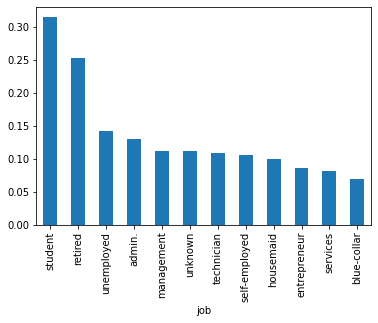

In [302]:
proportions = dataframe1[:, 1]/job
proportions.sort_values(ascending=False).plot(kind='bar')

From the above the 30% and 25% of the student and retired person is ready opern an account.

In [306]:
frame =data.groupby(['marital','y']).size()
frame

marital   y
divorced  0     4135
          1      476
married   0    22390
          1     2531
single    0     9944
          1     1620
unknown   0       68
          1       12
dtype: int64

In [307]:
dataf = data.groupby('marital').size()
dataf

marital
divorced     4611
married     24921
single      11564
unknown        80
dtype: int64

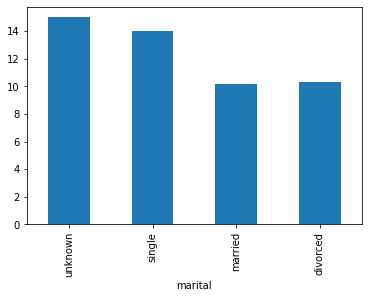

In [314]:
proportional = (frame[:,1]/dataf)*100
proportional.sort_index(ascending=False).plot(kind='bar')
plt.show()

Singles open more accounts when compared to divorced or married clients.

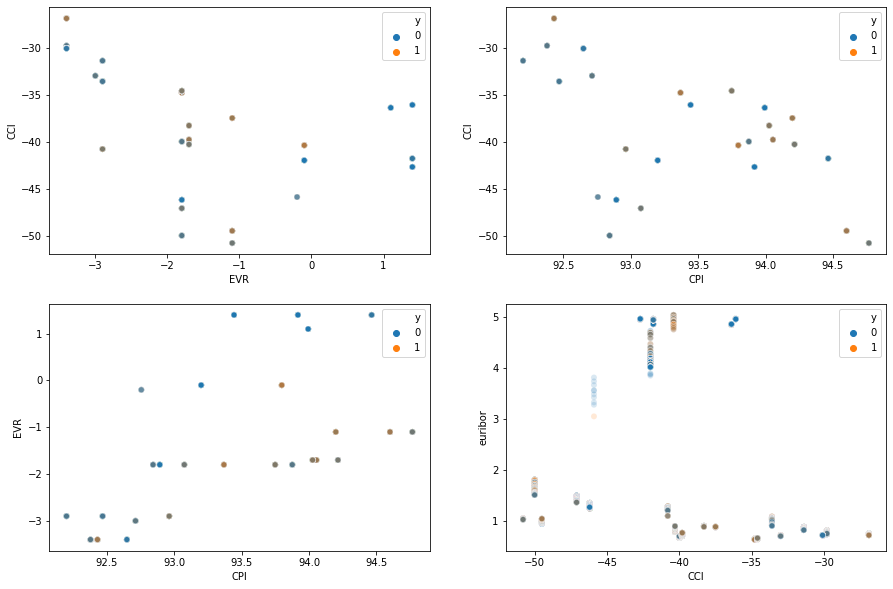

In [315]:

plt.figure(figsize = [15, 10])

# 1st plot: EVR vs CCI
plt.subplot(2, 2, 1)
sns.scatterplot(data = data, x = 'EVR', y = 'CCI', hue = 'y', alpha = 1/6);

# 2nd plot: CPI vs CCI
plt.subplot(2, 2, 2)
sns.scatterplot(data = data, x = 'CPI', y = 'CCI', hue = 'y', alpha = 1/6);

# 3rd plot: CPI vs EVR
plt.subplot(2, 2, 3)
sns.scatterplot(data = data, x = 'CPI', y = 'EVR', hue = 'y', alpha = 1/6);

# 4th plot: CCI vs euribor
plt.subplot(2, 2, 4)
sns.scatterplot(data = data, x = 'CCI', y = 'euribor', hue = 'y', alpha = 1/6)

-  1st plot - 'EVR' and 'CCI' don't seem to be correlated. But it does seem like there are more 'yes' dots when EVR is less than -1.
- 2nd plot - The points are plotted on top of each other and hence we cannot see any generic trend in the data. 'CPI' and 'CCI' don't seem to have a direct impact on 'y'.
- 3rd plot - CPI and EVR don't look correlated. Moreover, 'CPI' doesn't seem to have any impact on 'y' outcome. There does seem to be a fairly large concentration of 'yes' when 'EVR' is less than -1.
- 4th plot - It looks like there is a pattern when euribor is less than 2. 'CCI' doesn't have any impact on 'y' outcome

In [318]:
# average success rate when age is upto 60 years in overall data
data.query('age > 60')['y'].mean()

0.45544554455445546

In [321]:
# average success rate when age is upto 60 years in overall data.
data.query('age <= 60')['y'].mean()

0.10492462810738322

In [322]:
# number of records where euribor is less than 2

data.query('euribor < 2').shape[0]

13494

In [323]:
# number of records where euribor is equal to or more than 2

data.query('euribor >= 2').shape[0]

27682

**Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.**

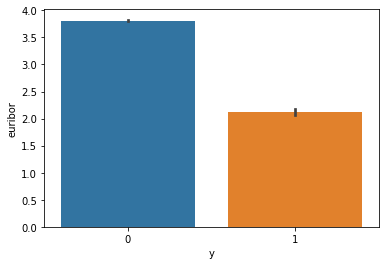

In [338]:
sns.barplot(x='y',y='euribor',data=data)
plt.show()

In [0]:
data2 = data[['no_emp','duration','EVR','CPI','CCI','euribor','y']]

In [356]:
data2.corr()

,no_emp,duration,EVR,CPI,CCI,euribor,y
no_emp,1.000000,-0.044672,0.906949,0.521945,0.100679,0.945146,-0.354669
duration,-0.044672,1.000000,-0.027941,0.005303,-0.008126,-0.032861,0.405297
EVR,0.906949,-0.027941,1.000000,0.775293,0.196257,0.972244,-0.298289
CPI,0.521945,0.005303,0.775293,1.000000,0.059170,0.688180,-0.136134
CCI,0.100679,-0.008126,0.196257,0.059170,1.000000,0.277864,0.054802
euribor,0.945146,-0.032861,0.972244,0.688180,0.277864,1.000000,-0.307740
y,-0.354669,0.405297,-0.298289,-0.136134,0.054802,-0.307740,1.000000


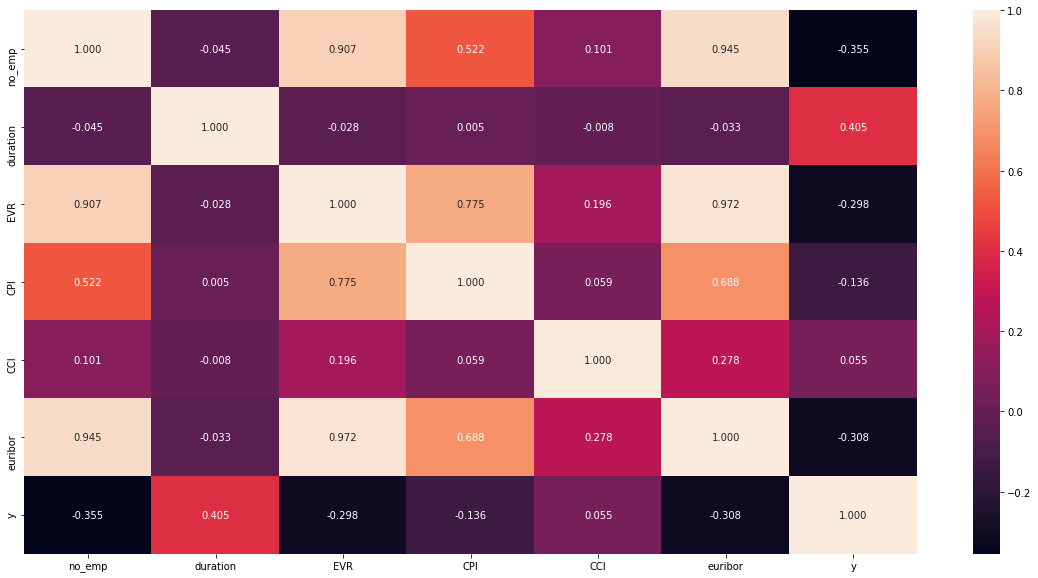

In [357]:
plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(),annot=True,fmt='.3f')
plt.show()

In [360]:
corr=abs(data2.corr()['y'])
corr

no_emp      0.354669
duration    0.405297
EVR         0.298289
CPI         0.136134
CCI         0.054802
euribor     0.307740
y           1.000000
Name: y, dtype: float64

In [0]:
good_corr = corr[corr>0.30]

In [362]:
good_corr

no_emp      0.354669
duration    0.405297
euribor     0.307740
y           1.000000
Name: y, dtype: float64

In [0]:
datacorr = data[['no_emp','duration','euribor','y']]

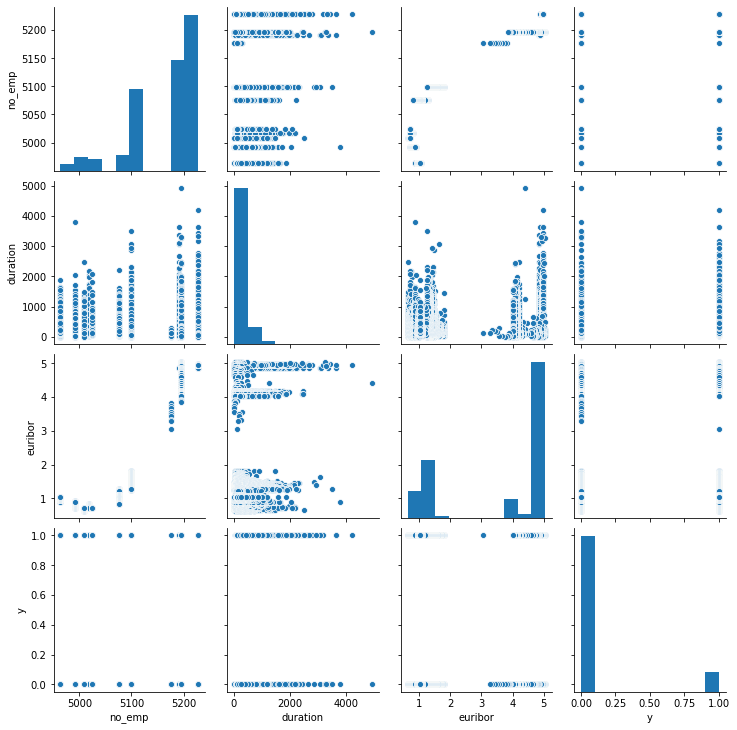

In [366]:
sns.pairplot(datacorr)
plt.show()

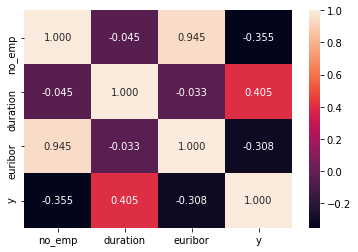

In [369]:
sns.heatmap(datacorr.corr(),annot=True,fmt='.3f')
plt.show()

These are the features are highly important.

